In [4]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [5]:
df = pd.read_csv("advertising.csv")

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [47]:
df['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


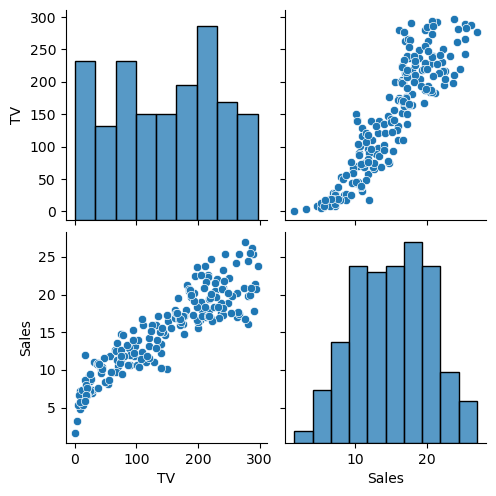

In [14]:
sns.pairplot(df[['TV', 'Sales']])
plt.show()

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df[['TV','Radio','Newspaper']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper


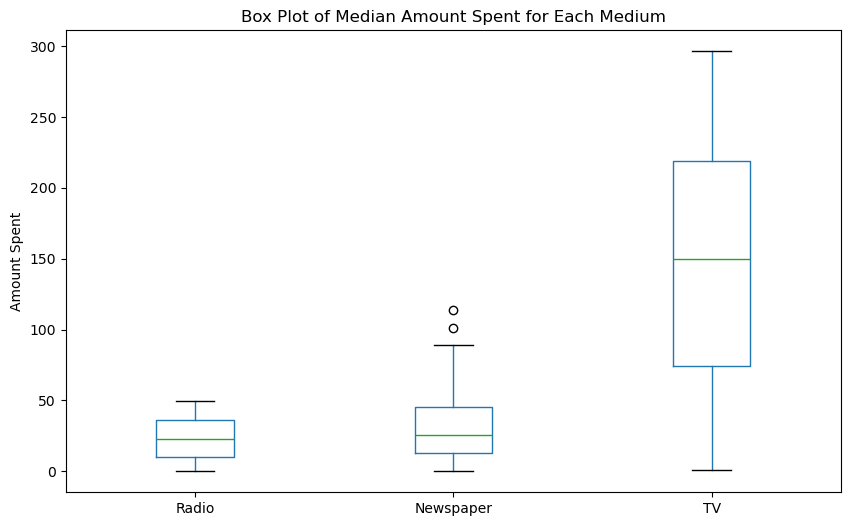

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.boxplot(column=['Radio', 'Newspaper', 'TV'])
plt.title('Box Plot of Median Amount Spent for Each Medium')
plt.ylabel('Amount Spent')
plt.xticks([1, 2, 3], ['Radio', 'Newspaper', 'TV'])
plt.grid(False)
plt.show()



<Axes: xlabel='TV', ylabel='Sales'>

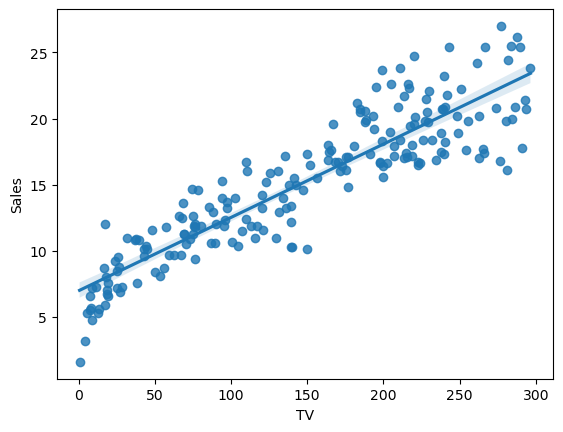

In [17]:

sns.regplot(data=df, x="TV", y="Sales")


In [50]:
correlation = np.corrcoef(df['TV'], df['Sales'])[0, 1]

print(f'The correlation coefficient between TV and Sales is: {correlation}')

The correlation coefficient between TV and Sales is: 0.9012079133023306


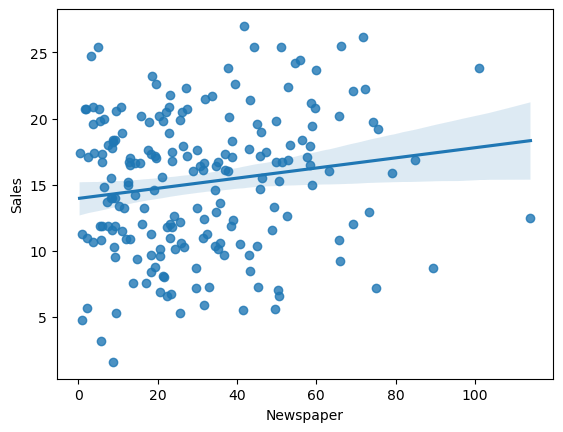

In [18]:
sns.regplot(data=df, x="Newspaper", y="Sales");

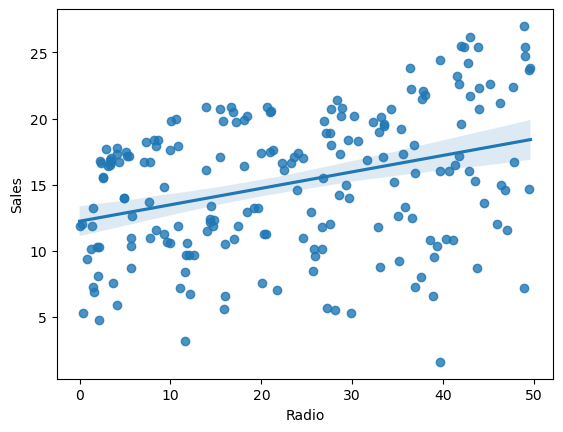

In [19]:
sns.regplot(data=df, x="Radio", y="Sales");

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


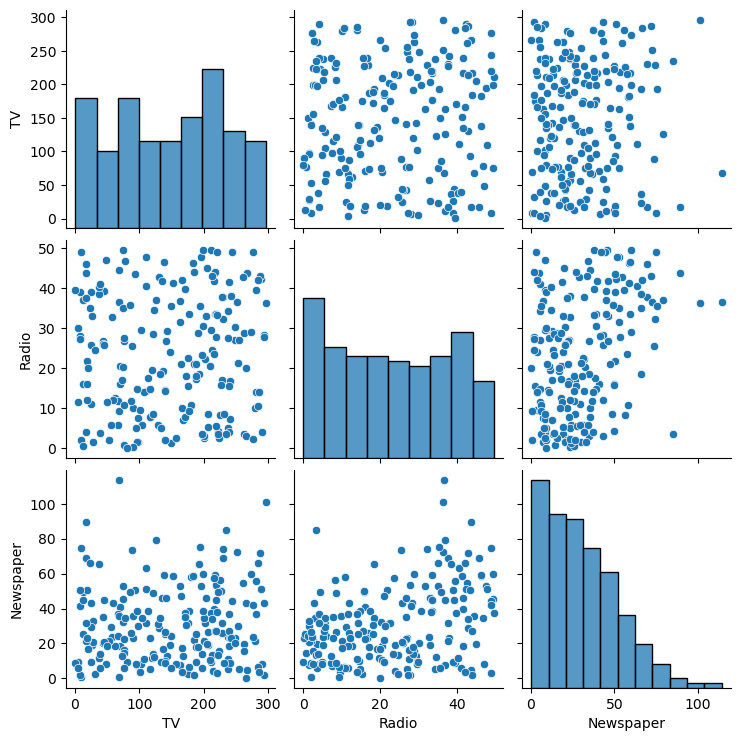

In [20]:
sns.pairplot(df[['TV','Radio','Newspaper']])

In [21]:
X = df['TV']
y = df['Sales']

In [22]:
print(X)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64


In [23]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [24]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=365)

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(X_train,y_train)

LinearRegression()

In [29]:
predictionsontraindata = reg.predict(X_train)

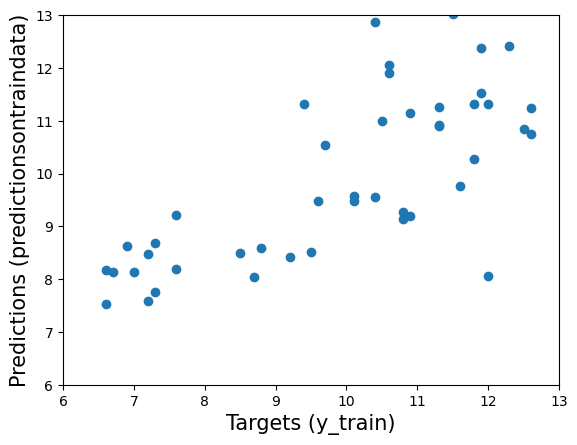

In [54]:
plt.scatter(y_train, predictionsontraindata)
plt.xlabel('Targets (y_train)',size=15)
plt.ylabel('Predictions (predictionsontraindata)',size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals for train data PDF')

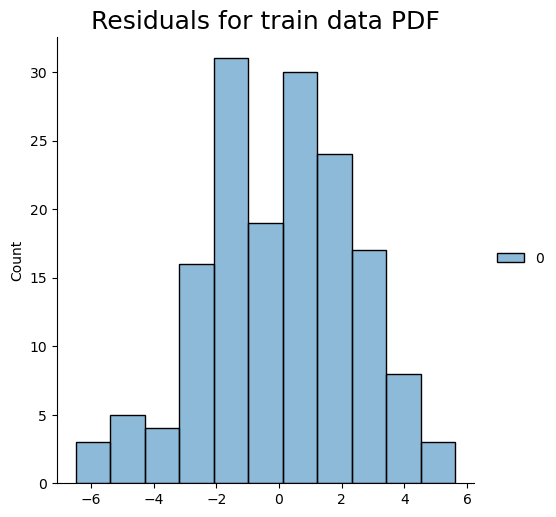

In [31]:
sns.displot(y_train - predictionsontraindata)

plt.title("Residuals for train data PDF", size=18)

In [32]:
score =round(reg.score(X_train,y_train),3)*100
intercept =reg.intercept_
coefficents =reg.coef_
print("Score: ",score)
print("Intercept: ",intercept)
print("Coefficents: ",coefficents)

Score:  80.7
Intercept:  [7.1025412]
Coefficents:  [[0.05513742]]


In [33]:
predictionsontestdata = reg.predict(X_test)

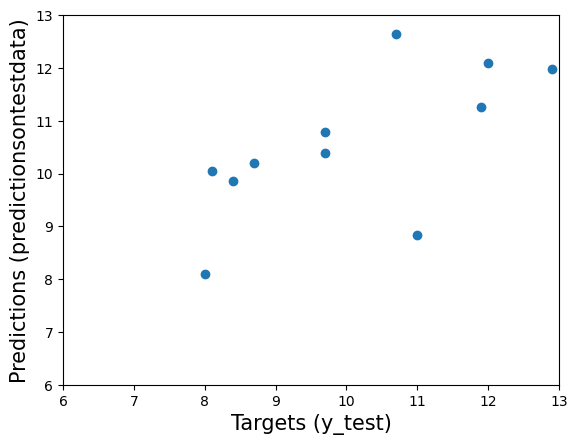

In [59]:
plt.scatter(y_test, predictionsontestdata, alpha=1)
plt.xlabel('Targets (y_test)',size=15)
plt.ylabel('Predictions (predictionsontestdata)',size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals for test data PDF')

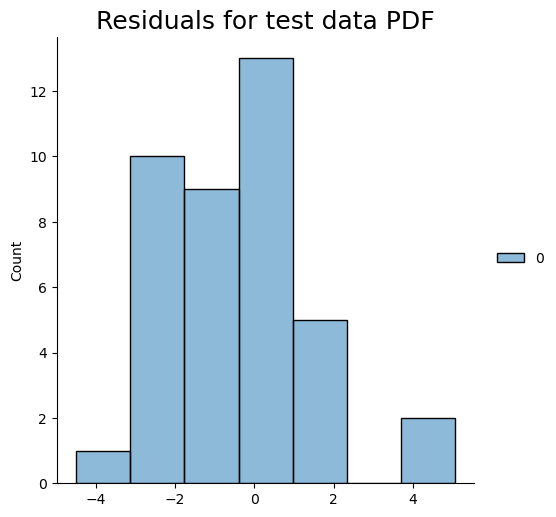

In [35]:
sns.displot(y_test - predictionsontestdata)

plt.title("Residuals for test data PDF", size=18)

In [36]:
score =round(reg.score(X_test,y_test),3)*100
intercept =reg.intercept_
coefficents =reg.coef_
print("Score: ",score)
print("Intercept: ",intercept)
print("Coefficents: ",coefficents)

Score:  83.3
Intercept:  [7.1025412]
Coefficents:  [[0.05513742]]


In [37]:
from scipy.stats import shapiro

residuals1=y_test-predictionsontestdata
shapiro_test_statistic, shapiro_p_value = shapiro(residuals1)

# Print results
print("Shapiro-Wilk Test Statistic:", shapiro_test_statistic)
print("Shapiro-Wilk p-value:", shapiro_p_value)

# Interpret the results based on the p-value
if shapiro_p_value > 0.05:
    print("The test data residuals look normally distributed (fail to reject H0)")
else:
    print("The test data residuals do not look normally distributed (reject H0)")


Shapiro-Wilk Test Statistic: 0.9503204226493835
Shapiro-Wilk p-value: 0.07778042554855347
The test data residuals look normally distributed (fail to reject H0)


In [38]:
from scipy.stats import shapiro

residuals2=y_train-predictionsontraindata
shapiro_test_statistic, shapiro_p_value = shapiro(residuals2)

# Print results
print("Shapiro-Wilk Test Statistic:", shapiro_test_statistic)
print("Shapiro-Wilk p-value:", shapiro_p_value)

# Interpret the results based on the p-value
if shapiro_p_value > 0.05:
    print("The train data residuals look normally distributed (fail to reject H0)")
else:
    print("The train data residuals do not look normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.9918002486228943
Shapiro-Wilk p-value: 0.49236994981765747
The train data residuals look normally distributed (fail to reject H0)


In [39]:
print(residuals1)

[[-2.49848178]
 [-2.77810935]
 [-4.49421112]
 [-1.38318363]
 [ 0.37825416]
 [ 1.88249083]
 [-0.089501  ]
 [-1.09123451]
 [-1.14455346]
 [-2.06186432]
 [-1.50126413]
 [-0.75662978]
 [ 5.07449093]
 [-0.0565788 ]
 [-1.93833804]
 [ 1.22156047]
 [ 0.21307013]
 [ 0.60654153]
 [-1.38463795]
 [-1.97184296]
 [ 0.63458368]
 [-3.02449422]
 [ 0.92882472]
 [-0.08696386]
 [-0.21374594]
 [-0.68873136]
 [-0.33930192]
 [-1.9523931 ]
 [ 2.16063011]
 [-1.45941214]
 [ 0.01832166]
 [ 1.6689432 ]
 [ 4.88803856]
 [-2.776723  ]
 [ 1.31004255]
 [ 0.82861349]
 [-1.86886636]
 [-0.59867602]
 [-1.86569552]
 [ 0.29400875]]


In [40]:
print(residuals2)

[[ 1.78178916]
 [ 0.40307449]
 [-0.83760239]
 [-1.91503999]
 [ 2.76048684]
 [-0.62428298]
 [ 0.69047375]
 [ 1.52705722]
 [ 0.12654979]
 [ 0.21977598]
 [-1.39365271]
 [-2.52484139]
 [ 3.23993717]
 [-4.59816859]
 [-1.39769515]
 [ 4.62990755]
 [ 0.55896456]
 [ 0.66563642]
 [ 2.31033874]
 [ 0.35472788]
 [ 4.02936614]
 [-0.447649  ]
 [ 3.02005518]
 [-1.29216441]
 [-2.853323  ]
 [ 2.23713782]
 [-0.61047314]
 [ 5.63062621]
 [-2.59088735]
 [ 3.24366641]
 [ 1.47218201]
 [ 2.32414859]
 [-2.10028326]
 [-0.49524296]
 [ 0.7381017 ]
 [ 1.26348043]
 [ 0.98594088]
 [-5.26212653]
 [-1.41225763]
 [ 2.4449095 ]
 [-1.42755578]
 [-1.6678685 ]
 [-6.47961465]
 [-1.9500672 ]
 [ 4.19428795]
 [-1.52429997]
 [-2.17416887]
 [-1.29769515]
 [-3.1322659 ]
 [-1.71899747]
 [ 1.70223689]
 [ 3.20255007]
 [ 2.24065583]
 [ 0.30981432]
 [ 1.35663865]
 [ 0.01350959]
 [-5.54113739]
 [-1.54054501]
 [ 2.40956911]
 [-1.49993609]
 [ 0.45339984]
 [ 2.86999204]
 [-2.4699152 ]
 [-1.43361093]
 [ 0.48496001]
 [ 3.54337022]
 [-1.31052

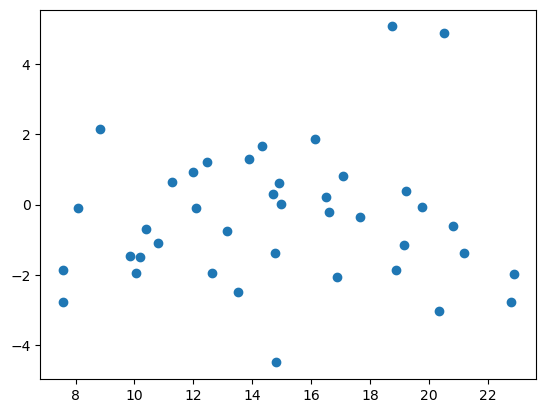

In [41]:
plt.scatter(predictionsontestdata,residuals1)

In [42]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming you have your predictions on test data and residuals stored in 'predictionsontestdata' and 'residuals1' respectively
# You may need to reshape the arrays depending on their shapes
# predictionsontestdata = predictionsontestdata.reshape(-1,1)

# Fit a constant model (OLS) to get residuals
model = sm.OLS(residuals1, sm.add_constant(predictionsontestdata)).fit()

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print("Breusch-Pagan test p-value:", bp_test[1])


Breusch-Pagan test p-value: 0.11652295225680062


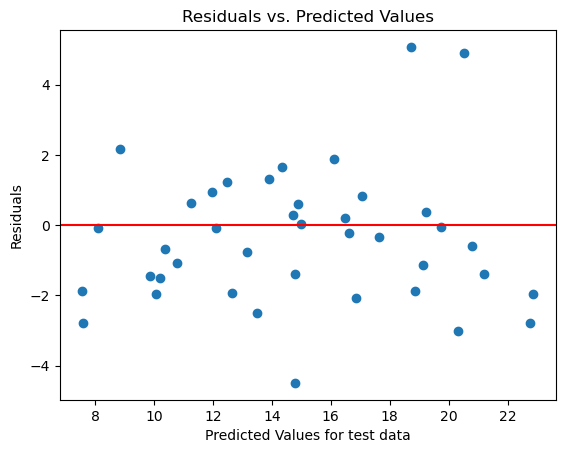

In [60]:
import matplotlib.pyplot as plt

# Create a scatter plot of residuals vs. predicted values
plt.scatter(predictionsontestdata, residuals1)
plt.xlabel('Predicted Values for test data')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

# Optionally, add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='-')

# Show the plot
plt.show()


In [76]:
act_predict = pd.DataFrame({
    'Actual test data y values': y_test.flatten(), 
    'Predicted test data y values': predictionsontestdata.flatten()
})

# Display the first 5 rows of the DataFrame
print(act_predict.head(5))



   Actual test data y values  Predicted test data y values
0                       11.0                     13.498482
1                       20.0                     22.778109
2                       10.3                     14.794211
3                       13.4                     14.783184
4                       19.6                     19.221746


<Axes: >

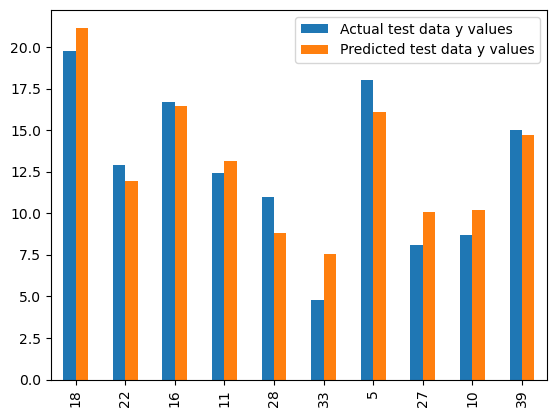

In [45]:
act_predict.sample(10).plot(kind='bar')

In [46]:
X1 = df[['TV', 'Radio', 'Newspaper']]
y1 = df.Sales

In [77]:
mlr=LinearRegression()
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size= 0.2, random_state = 10)

In [78]:
mlr.fit(X1_train, y1_train)

LinearRegression()

In [79]:
round(mlr.score(X1_test,y1_test),3)*100

81.8

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

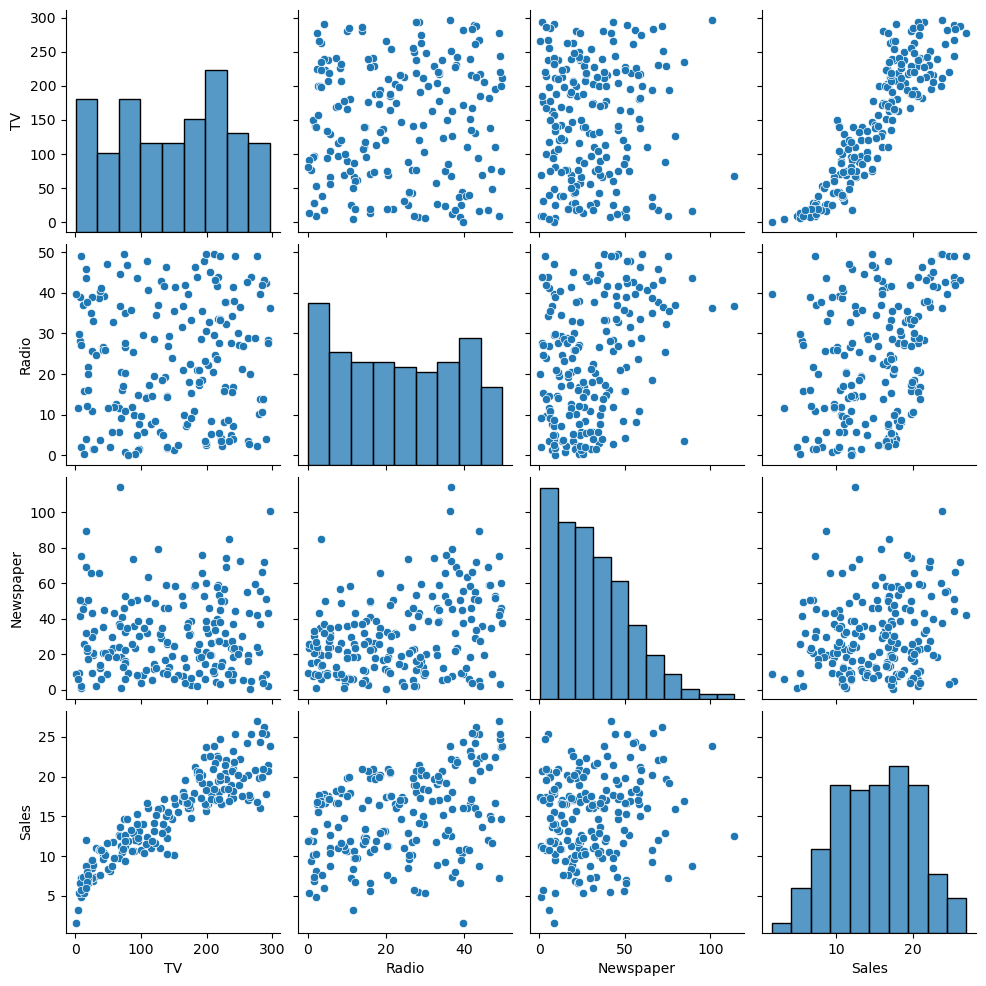

In [75]:
sns.pairplot(df[['TV','Radio','Newspaper','Sales']])

In [51]:
correlation = np.corrcoef(df['Radio'], df['Sales'])[0, 1]

print(f'The correlation coefficient between TV and Sales is: {correlation}')

The correlation coefficient between TV and Sales is: 0.3496310970076693


In [52]:
correlation = np.corrcoef(df['Newspaper'], df['Sales'])[0, 1]

print(f'The correlation coefficient between TV and Sales is: {correlation}')

The correlation coefficient between TV and Sales is: 0.15796002615492621


In [57]:
TV = 200
predicted_sales = 7.1025412 + 0.05513742 * TV
print(f"Predicted Sales for a TV budget of {TV} units: {predicted_sales}")


Predicted Sales for a TV budget of 200 units: 18.1300252
